# 🍄 Mushroom Data Exploration


This notebook explores the mushroom dataset to understand:
- Dataset structure and statistics
- Feature distributions
- Class balance (edible vs poisonous)
- Correlations between features
- Data quality issues

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load Primary Data

In [22]:
# Load primary data
primary_df = pd.read_csv('../dataset/primary_data.csv', delimiter=';')
print(f"✅ Loaded primary data: {primary_df.shape[0]} rows, {primary_df.shape[1]} columns")
print(f"\nShape: {primary_df.shape}")
primary_df.head(10)

✅ Loaded primary data: 173 rows, 23 columns

Shape: (173, 23)


,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,[w],"[15, 20]","[15, 20]",[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,[w],"[6, 10]","[10, 20]",NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,[w],"[10, 12]","[10, 20]",NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,[w],"[7, 15]","[10, 25]",[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],[w],"[10, 12]","[10, 20]",NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
5,Amanita Family,False Death Cap,e,"[4, 9]",[x],NaN,"[w, y]",[f],[e],NaN,[w],"[5, 7]","[10, 15]",[b],NaN,"[w, y]",[u],"[y, w]",[t],[g],NaN,[d],"[u, a]"
6,Amanita Family,Destroying Angel,p,"[5, 10]",[b],[t],[w],[f],[e],[c],[w],"[10, 15]","[10, 15]",NaN,[y],[w],[u],[w],[t],"[l, e]",NaN,[d],"[u, a]"
7,Amanita Family,Tawny Grisette,e,"[4, 8]","[c, x]","[h, t]",[n],[f],[e],NaN,[w],"[10, 15]","[10, 15]",NaN,[s],"[w, n]",[u],[w],[f],[f],NaN,[d],"[u, a]"
8,Lepiota Family,Parasol Mushroom,e,"[10, 25]","[p, f]",[y],"[w, n]",[f],NaN,NaN,[w],"[15, 35]","[15, 25]",[s],NaN,[n],NaN,NaN,[t],[m],NaN,"[m, d]","[u, a]"
9,Lepiota Family,Shaggy Parasol,e,"[12, 18]",[x],"[e, y]",[n],[t],[e],NaN,[w],"[8, 12]","[15, 20]",NaN,NaN,[w],NaN,NaN,[t],NaN,NaN,"[g, d]","[u, a]"


In [23]:
# Get basic info
print("\n📊 Primary Data Info:")
print("=" * 60)
primary_df.info()


📊 Primary Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   class                 173 non-null    object
 3   cap-diameter          173 non-null    object
 4   cap-shape             173 non-null    object
 5   Cap-surface           133 non-null    object
 6   cap-color             173 non-null    object
 7   does-bruise-or-bleed  173 non-null    object
 8   gill-attachment       145 non-null    object
 9   gill-spacing          102 non-null    object
 10  gill-color            173 non-null    object
 11  stem-height           173 non-null    object
 12  stem-width            173 non-null    object
 13  stem-root             27 non-null     object
 14  stem-surface          65 non-null     object
 15  stem-color        


🎯 Class Distribution (Primary):
class
p    96
e    77
Name: count, dtype: int64

Edible: 77 (44.5%)
Poisonous: 96 (55.5%)


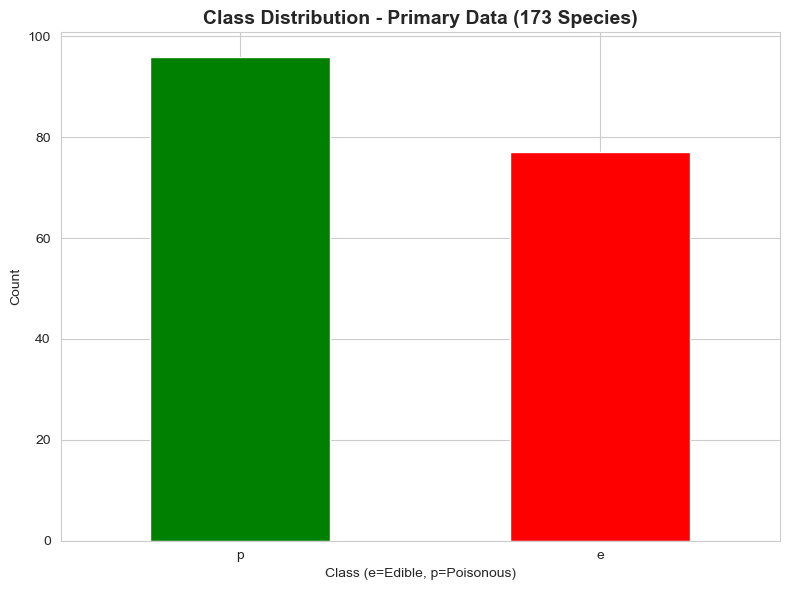

In [24]:
# Check class distribution in primary data
print("\n🎯 Class Distribution (Primary):")
print("=" * 60)
class_dist = primary_df['class'].value_counts()
print(class_dist)
print(f"\nEdible: {class_dist.get('e', 0)} ({class_dist.get('e', 0)/len(primary_df)*100:.1f}%)")
print(f"Poisonous: {class_dist.get('p', 0)} ({class_dist.get('p', 0)/len(primary_df)*100:.1f}%)")

# Visualize
plt.figure(figsize=(8, 6))
class_dist.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution - Primary Data (173 Species)', fontsize=14, fontweight='bold')
plt.xlabel('Class (e=Edible, p=Poisonous)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


👨‍👩‍👧‍👦 Family Distribution:
family
Tricholoma Family     43
Russula Family        27
Bolete Family         14
Ink Cap Family        13
Cortinarius Family    11
Stropharia Family      8
Amanita Family         8
Wax Gill Family        8
Entoloma Family        7
Bracket Fungi          7
Name: count, dtype: int64


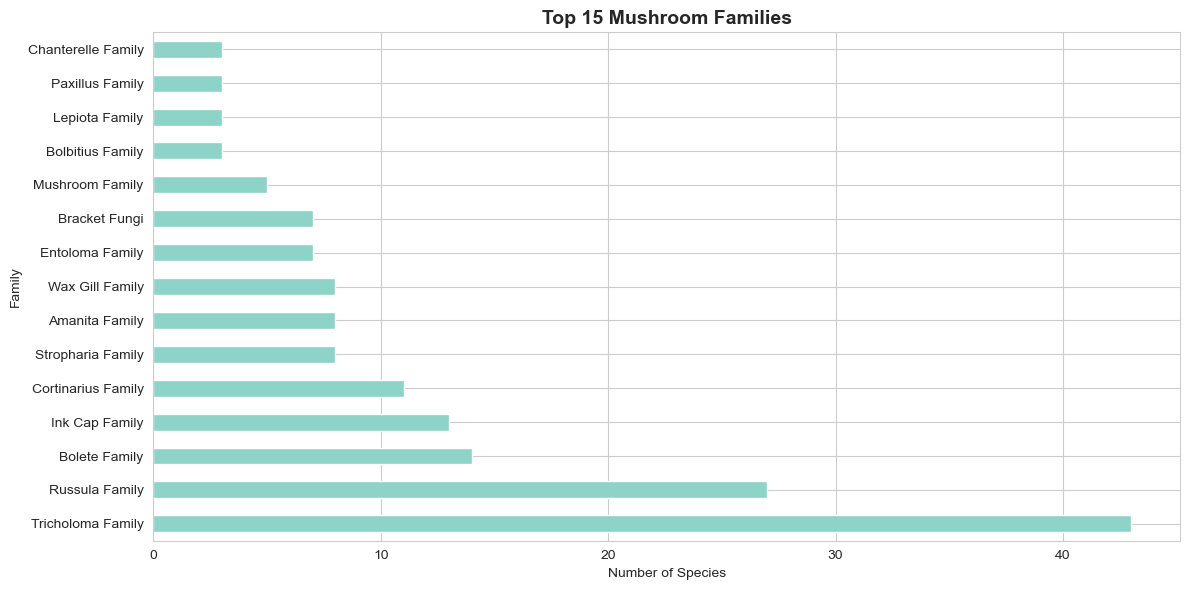

In [25]:
# Family distribution
print("\n👨‍👩‍👧‍👦 Family Distribution:")
print("=" * 60)
family_dist = primary_df['family'].value_counts()
print(family_dist.head(10))

# Visualize top families
plt.figure(figsize=(12, 6))
family_dist.head(15).plot(kind='barh')
plt.title('Top 15 Mushroom Families', fontsize=14, fontweight='bold')
plt.xlabel('Number of Species')
plt.ylabel('Family')
plt.tight_layout()
plt.show()

## 2. Load Secondary Data

In [26]:
# Load secondary data
secondary_df = pd.read_csv('../dataset/secondary_data.csv', delimiter=';')

# Clean column names
secondary_df.columns = secondary_df.columns.str.lower().str.replace('-', '_')

print(f"✅ Loaded secondary data: {secondary_df.shape[0]} rows, {secondary_df.shape[1]} columns")
print(f"\nShape: {secondary_df.shape}")
secondary_df.head(10)

✅ Loaded secondary data: 61069 rows, 21 columns

Shape: (61069, 21)


,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,18.79,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,16.89,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,17.44,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,18.69,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,16.88,s,y,w,u,w,t,p,NaN,d,w


In [27]:
# Get detailed info
print("\n📊 Dataset Statistics:")
print("=" * 60)
print(f"Shape: {secondary_df.shape}")
print(f"\nColumns ({len(secondary_df.columns)}):")
for col in secondary_df.columns:
    print(f"  - {col}")
    
print(f"\nClass Distribution: {secondary_df['class'].value_counts().to_dict()}")


📊 Dataset Statistics:
Shape: (61069, 21)

Columns (21):
  - class
  - cap_diameter
  - cap_shape
  - cap_surface
  - cap_color
  - does_bruise_or_bleed
  - gill_attachment
  - gill_spacing
  - gill_color
  - stem_height
  - stem_width
  - stem_root
  - stem_surface
  - stem_color
  - veil_type
  - veil_color
  - has_ring
  - ring_type
  - spore_print_color
  - habitat
  - season

Class Distribution: {'p': 33888, 'e': 27181}


In [28]:
# Check for missing values
print("\n❓ Missing Values:")
print("=" * 60)
missing = secondary_df.isnull().sum()
missing_pct = (missing / len(secondary_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_summary = missing_df[missing_df['Missing Count'] > 0]
if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("✅ No missing values!")


❓ Missing Values:
                   Missing Count  Percentage
cap_surface                14120       23.12
gill_attachment             9884       16.18
gill_spacing               25063       41.04
stem_root                  51538       84.39
stem_surface               38124       62.43
veil_type                  57892       94.80
veil_color                 53656       87.86
ring_type                   2471        4.05
spore_print_color          54715       89.60



🎯 Class Distribution (Secondary):
class
p    33888
e    27181
Name: count, dtype: int64

Edible: 27,181 (44.5%)
Poisonous: 33,888 (55.5%)


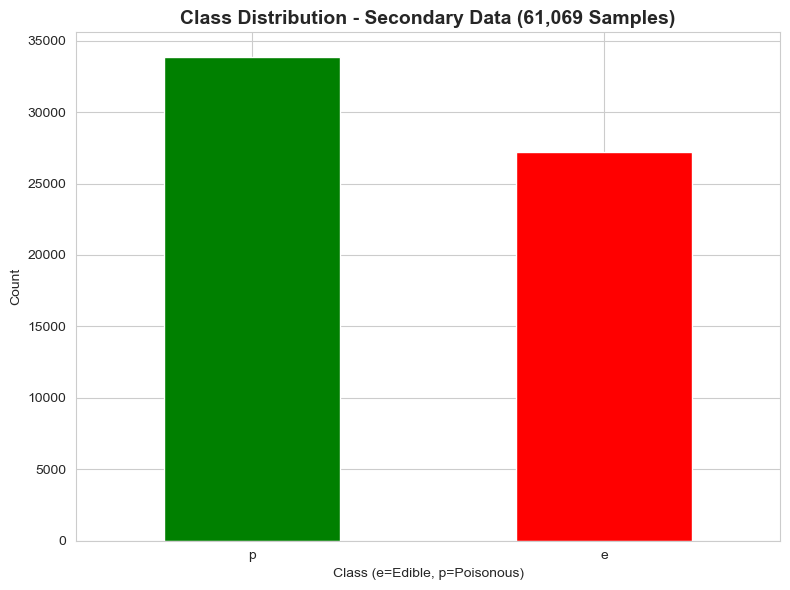

In [29]:
# Class distribution in secondary data
print("\n🎯 Class Distribution (Secondary):")
print("=" * 60)
class_dist_sec = secondary_df['class'].value_counts()
print(class_dist_sec)
print(f"\nEdible: {class_dist_sec.get('e', 0):,} ({class_dist_sec.get('e', 0)/len(secondary_df)*100:.1f}%)")
print(f"Poisonous: {class_dist_sec.get('p', 0):,} ({class_dist_sec.get('p', 0)/len(secondary_df)*100:.1f}%)")

# Visualize
plt.figure(figsize=(8, 6))
class_dist_sec.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution - Secondary Data (61,069 Samples)', fontsize=14, fontweight='bold')
plt.xlabel('Class (e=Edible, p=Poisonous)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3. Numerical Features Analysis

In [30]:
# Analyze numerical features
numerical_cols = ['cap_diameter', 'stem_height', 'stem_width']

print("\n📏 Numerical Features Statistics:")
print("=" * 60)
print(secondary_df[numerical_cols].describe())


📏 Numerical Features Statistics:
       cap_diameter   stem_height    stem_width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000


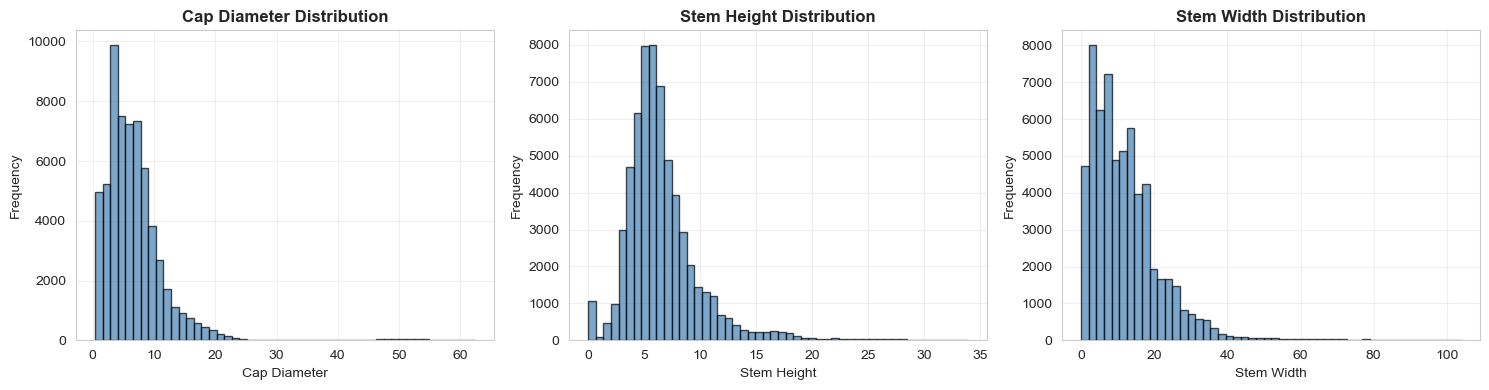

In [31]:
# Visualize distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(secondary_df[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

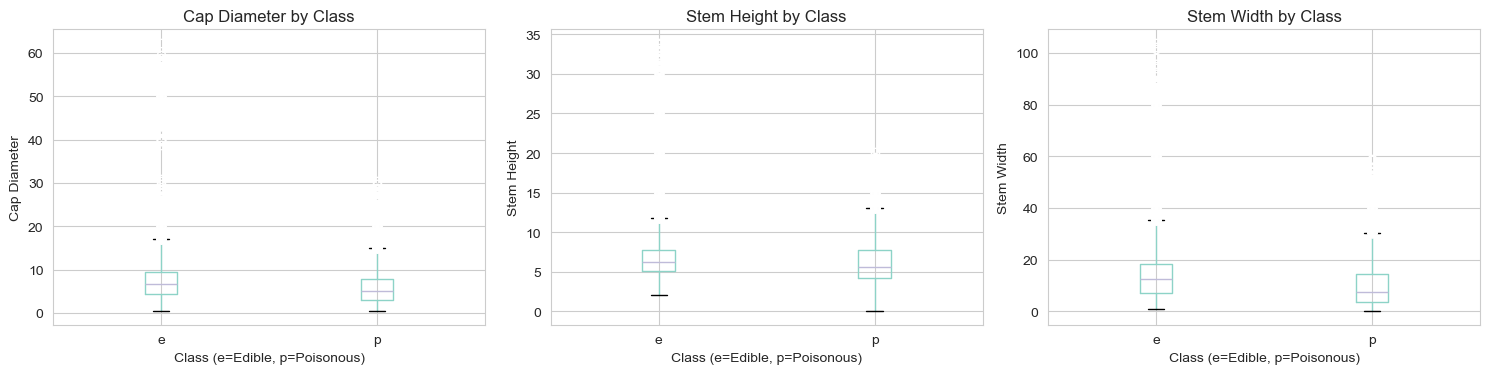

In [32]:
# Numerical features by class
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(numerical_cols):
    secondary_df.boxplot(column=col, by='class', ax=axes[idx])
    axes[idx].set_title(f'{col.replace("_", " ").title()} by Class')
    axes[idx].set_xlabel('Class (e=Edible, p=Poisonous)')
    axes[idx].set_ylabel(col.replace('_', ' ').title())

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

## 4. Categorical Features Analysis

In [33]:
# Get categorical columns
categorical_cols = [col for col in secondary_df.columns if col not in numerical_cols + ['class']]

print(f"\n📋 Categorical Features ({len(categorical_cols)}):")
print("=" * 60)
for col in categorical_cols:
    unique_count = secondary_df[col].nunique()
    print(f"{col:30} - {unique_count} unique values")


📋 Categorical Features (17):
cap_shape                      - 7 unique values
cap_surface                    - 11 unique values
cap_color                      - 12 unique values
does_bruise_or_bleed           - 2 unique values
gill_attachment                - 7 unique values
gill_spacing                   - 3 unique values
gill_color                     - 12 unique values
stem_root                      - 5 unique values
stem_surface                   - 8 unique values
stem_color                     - 13 unique values
veil_type                      - 1 unique values
veil_color                     - 6 unique values
has_ring                       - 2 unique values
ring_type                      - 8 unique values
spore_print_color              - 7 unique values
habitat                        - 8 unique values
season                         - 4 unique values


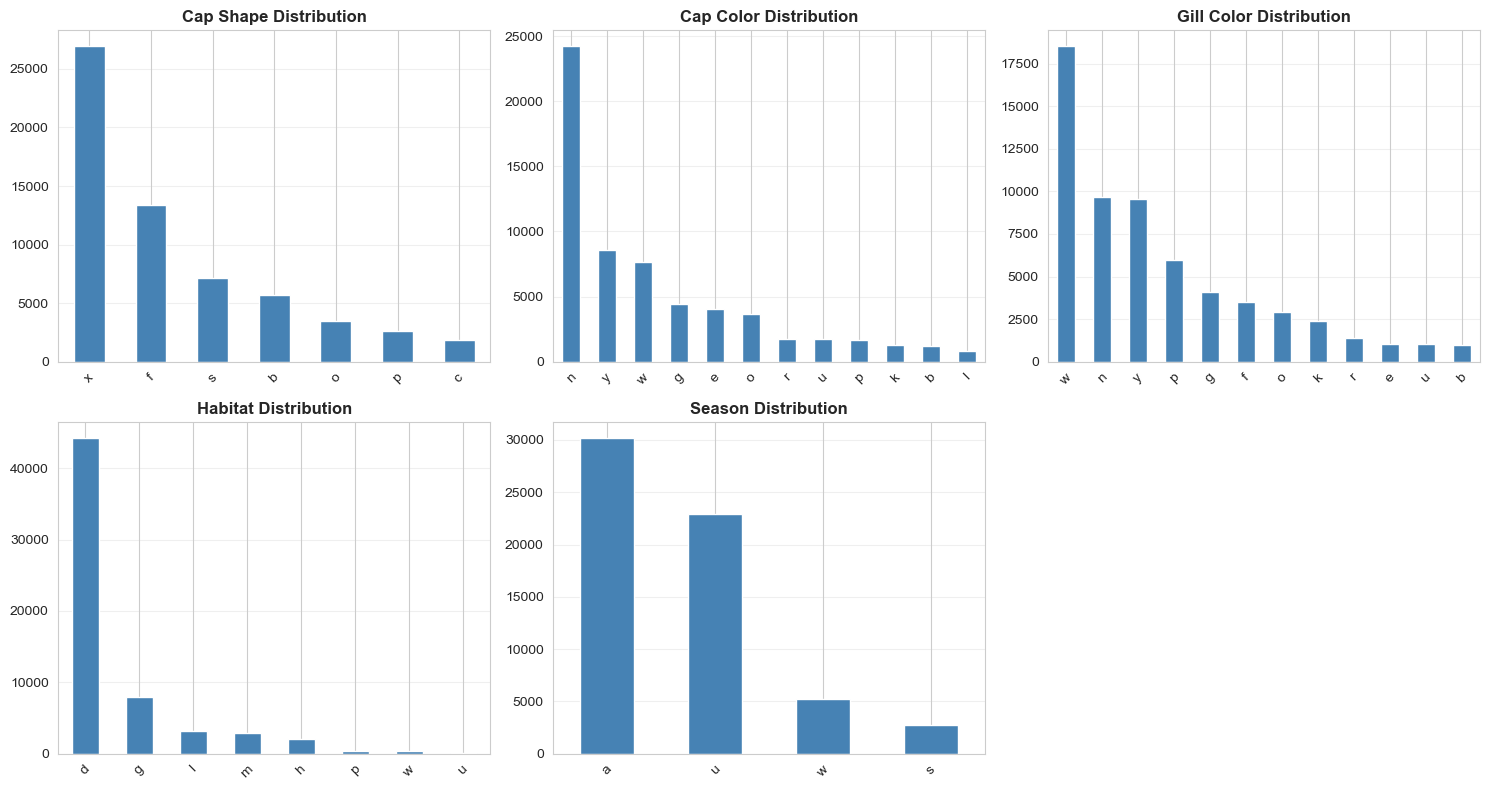

In [34]:
# Visualize top categorical features
top_features = ['cap_shape', 'cap_color', 'gill_color', 'habitat', 'season']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(top_features):
    if col in secondary_df.columns:
        secondary_df[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3, axis='y')

# Remove extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## 5. Feature-Target Relationships


🎨 Cap Color vs Edibility (% by row):
class         e     p
cap_color            
b          79.2  20.8
e          21.8  78.2
g          52.0  48.0
k          39.2  60.8
l          54.6  45.4
n          51.2  48.8
o          29.3  70.7
p          26.4  73.6
r          11.1  88.9
u          35.8  64.2
w          48.9  51.1
y          42.0  58.0


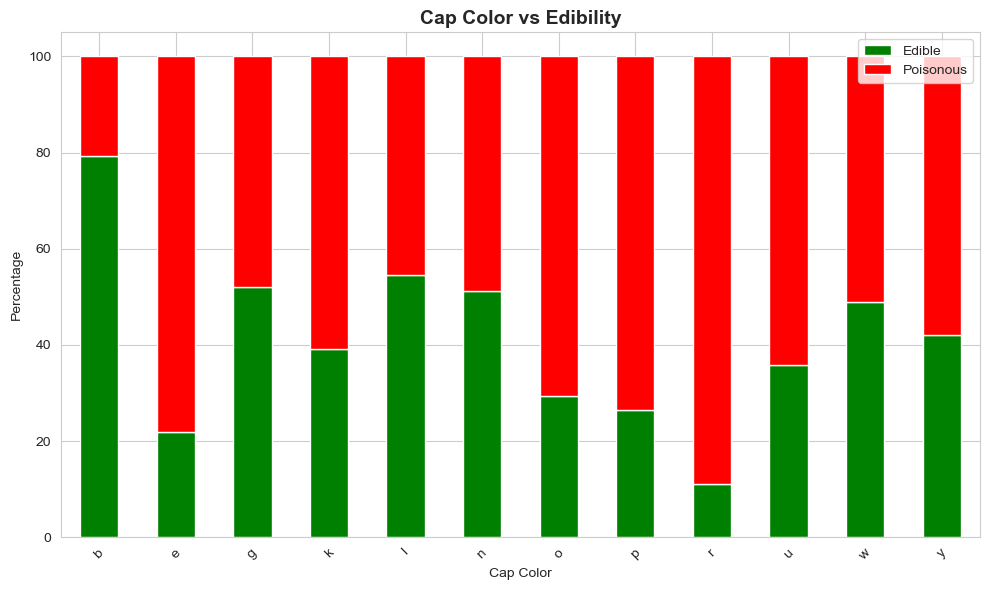

In [35]:
# Analyze which features are most predictive of edibility
# Example: cap_color vs class
if 'cap_color' in secondary_df.columns:
    cross_tab = pd.crosstab(secondary_df['cap_color'], secondary_df['class'], normalize='index') * 100
    print("\n🎨 Cap Color vs Edibility (% by row):")
    print("=" * 60)
    print(cross_tab.round(1))
    
    cross_tab.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
    plt.title('Cap Color vs Edibility', fontsize=14, fontweight='bold')
    plt.xlabel('Cap Color')
    plt.ylabel('Percentage')
    plt.legend(['Edible', 'Poisonous'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


🌲 Habitat vs Edibility (% by row):
class        e      p
habitat              
d         45.6   54.4
g         31.3   68.7
h         34.8   65.2
l         61.2   38.8
m         48.9   51.1
p          0.0  100.0
u        100.0    0.0
w        100.0    0.0


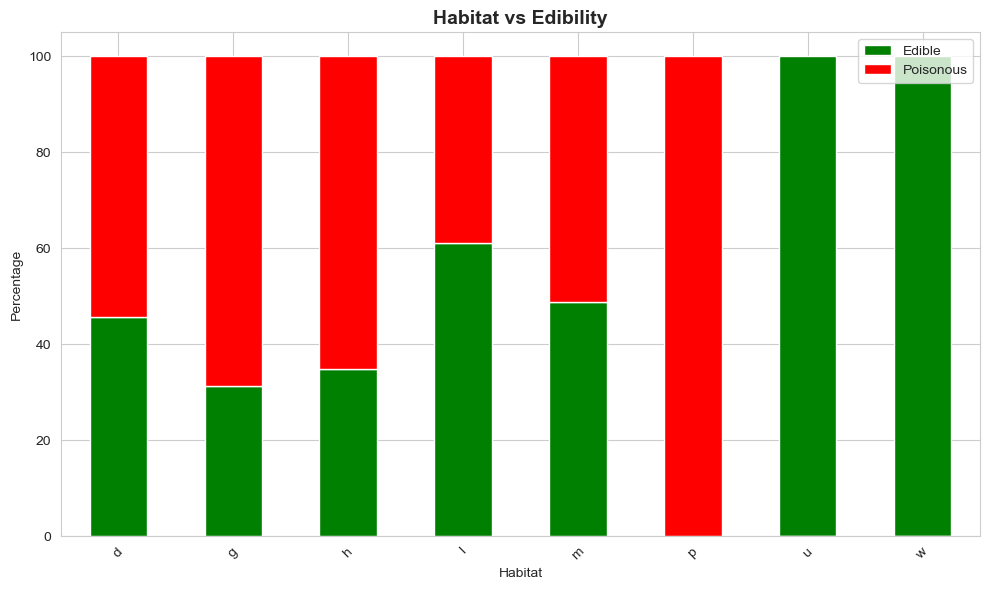

In [36]:
# Habitat vs class
if 'habitat' in secondary_df.columns:
    cross_tab = pd.crosstab(secondary_df['habitat'], secondary_df['class'], normalize='index') * 100
    print("\n🌲 Habitat vs Edibility (% by row):")
    print("=" * 60)
    print(cross_tab.round(1))
    
    cross_tab.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
    plt.title('Habitat vs Edibility', fontsize=14, fontweight='bold')
    plt.xlabel('Habitat')
    plt.ylabel('Percentage')
    plt.legend(['Edible', 'Poisonous'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


🍂 Season vs Edibility (% by row):
class      e     p
season            
a       42.4  57.6
s       56.9  43.1
u       42.1  57.9
w       60.7  39.3


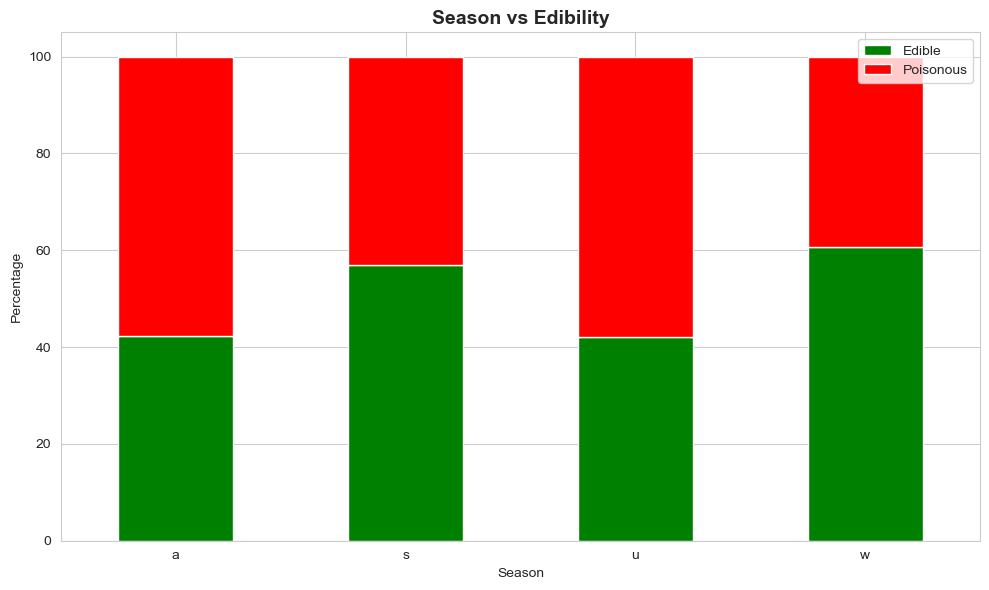

In [37]:
# Season vs class
if 'season' in secondary_df.columns:
    cross_tab = pd.crosstab(secondary_df['season'], secondary_df['class'], normalize='index') * 100
    print("\n🍂 Season vs Edibility (% by row):")
    print("=" * 60)
    print(cross_tab.round(1))
    
    cross_tab.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
    plt.title('Season vs Edibility', fontsize=14, fontweight='bold')
    plt.xlabel('Season')
    plt.ylabel('Percentage')
    plt.legend(['Edible', 'Poisonous'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## 6. Correlation Analysis (Numerical Features)

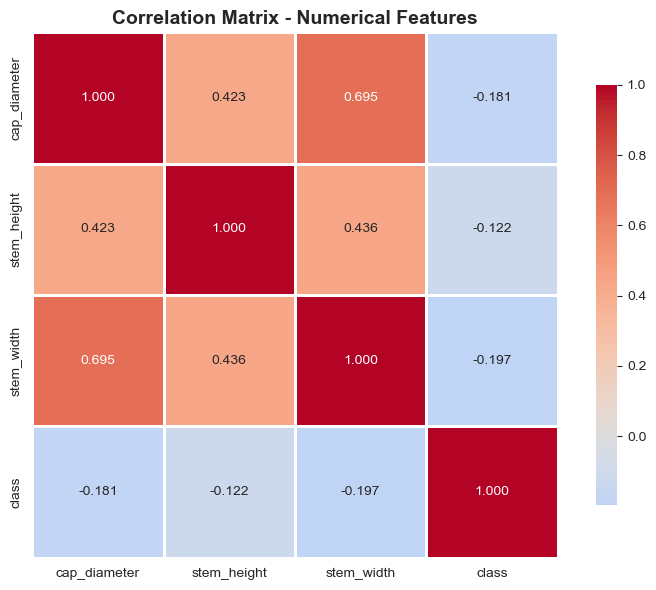


Correlation with Poisonous Class (1=Poisonous, 0=Edible):
class           1.000000
stem_height    -0.121593
cap_diameter   -0.181139
stem_width     -0.197368
Name: class, dtype: float64


In [38]:
# Correlation matrix for numerical features
numerical_data = secondary_df[numerical_cols + ['class']].copy()
numerical_data['class'] = (numerical_data['class'] == 'p').astype(int)  # Convert to binary

correlation = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Poisonous Class (1=Poisonous, 0=Edible):")
print("=" * 60)
print(correlation['class'].sort_values(ascending=False))

## 7. Data Quality Summary

In [39]:
print("\n✅ DATA QUALITY SUMMARY")
print("=" * 60)
print(f"Total samples: {len(secondary_df):,}")
print(f"Total features: {len(secondary_df.columns) - 1}")
print(f"Missing values: {secondary_df.isnull().sum().sum()}")
print(f"Duplicate rows: {secondary_df.duplicated().sum()}")
print(f"\nClass balance:")
print(f"  Edible: {(secondary_df['class'] == 'e').sum():,} ({(secondary_df['class'] == 'e').sum()/len(secondary_df)*100:.1f}%)")
print(f"  Poisonous: {(secondary_df['class'] == 'p').sum():,} ({(secondary_df['class'] == 'p').sum()/len(secondary_df)*100:.1f}%)")
print("\n✅ Dataset is ready for model training!")


✅ DATA QUALITY SUMMARY
Total samples: 61,069
Total features: 20
Missing values: 307463
Duplicate rows: 146

Class balance:
  Edible: 27,181 (44.5%)
  Poisonous: 33,888 (55.5%)

✅ Dataset is ready for model training!


## 8. Sample Records

In [40]:
# Show some edible mushrooms
print("\n🟢 Sample Edible Mushrooms:")
print("=" * 60)
edible_samples = secondary_df[secondary_df['class'] == 'e'].sample(5, random_state=42)
display(edible_samples[['cap_diameter', 'cap_shape', 'cap_color', 'habitat', 'season', 'class']])

# Show some poisonous mushrooms
print("\n🔴 Sample Poisonous Mushrooms:")
print("=" * 60)
poisonous_samples = secondary_df[secondary_df['class'] == 'p'].sample(5, random_state=42)
display(poisonous_samples[['cap_diameter', 'cap_shape', 'cap_color', 'habitat', 'season', 'class']])


🟢 Sample Edible Mushrooms:


,cap_diameter,cap_shape,cap_color,habitat,season,class
48721,11.58,x,n,d,a,e
25237,15.80,s,k,d,u,e
14478,3.42,x,o,d,w,e
24051,7.44,x,n,d,a,e
33619,7.31,x,w,d,a,e



🔴 Sample Poisonous Mushrooms:


,cap_diameter,cap_shape,cap_color,habitat,season,class
59141,4.08,f,n,d,u,p
38443,9.17,x,n,h,a,p
11075,2.66,x,e,d,a,p
47375,3.00,b,g,g,u,p
27300,17.87,x,w,d,a,p


## 9. Key Insights

**Observations**

- Most predictive features:
- Dataset balanced:
- Data quality issues:
- Preprocessing steps:
